## Decision Trees 

This notebook will demonstrate an appliction of the concept on the [Diabiatic Patients](dataset/diabetes.csv) dataset. 

In [8]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV
import time

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report #for nice end formatting
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
#importing the dataset as a dataframe
df = pd.read_csv("/Users/vinodk/Documents/Rice Univeristy/4th semster/Data Science and ML /INDE 577 Repository/Data-Science-and-Machine-Learning-INDE-577---Spring-2024-/Supervised Learning/7_Decision Trees/Dataset/diabetes.csv")

## Pre-Processing

Before we can create decision trees, we need to pre-process the data and encode labels. We will do this using sklearn's preprocessing package.

In [3]:
# check for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# Output the information about the dataset
print("Information about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
# Display the top 5 rows of the dataset to inspect the data
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### Test and train

In [6]:
# Separate features and the target variable from the dataset
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

# Normalize the feature data
normalizer = StandardScaler()
X_normalized = normalizer.fit_transform(X)

# Divide the dataset into training and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)


### Model Building 

In [9]:
#Model Building and Training
# Initialize a Decision Tree classifier
dt= DecisionTreeClassifier(max_depth=3, criterion='gini', splitter='best')

# Execute 5-fold cross-validation to assess model reliability
cross_val_scores = cross_val_score(dt, X_train, Y_train, cv=5, scoring='accuracy')
average_cv_score = cross_val_scores.mean()

# Train the Decision Tree classifier using the training data
dt.fit(X_train, Y_train)

# Display the average cross-validation accuracy
print(f'Average CV Accuracy: {average_cv_score:.2f}')


Average CV Accuracy: 0.76


In [10]:
## Evaluate the model on the training set
# Predict the outcomes for the training dataset
predictions_train = dt.predict(X_train)
accuracy_train = accuracy_score(Y_train, predictions_train)

# Predict the outcomes for the testing dataset
predictions_test = dt.predict(X_test)
accuracy_test = accuracy_score(Y_test, predictions_test)

# Output the accuracy scores for both training and testing sets
print(f"Training set accuracy: {accuracy_train:.3f}")
print(f"Test set accuracy: {accuracy_test:.3f}")

# Output the detailed classification report for the testing set
print(classification_report(Y_test, predictions_test))


Training set accuracy: 0.777
Test set accuracy: 0.760
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



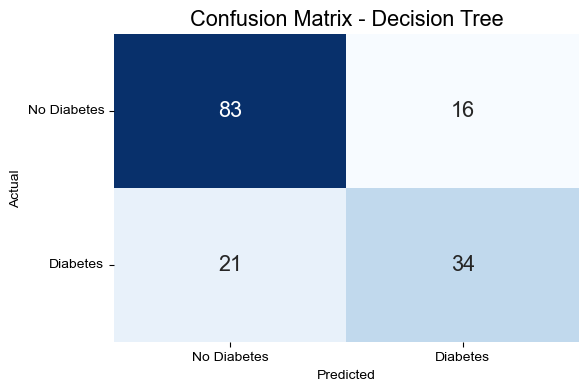

In [11]:
# Visualization of confusion matrix using seaborn
# Import metrics from sklearn 
from sklearn import metrics
# Generate the confusion matrix
conf_matrix = metrics.confusion_matrix(Y_test, predictions_test)


# Convert the confusion matrix into a pandas DataFrame for better visual formatting
conf_matrix_df = pd.DataFrame(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
axis = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df,
            annot=True,
            fmt="g",
            ax=axis,
            cmap="Blues",
            cbar=False)  # 
axis.set_title("Confusion Matrix - Decision Tree")
axis.set_xlabel("Predicted", fontsize=10)
axis.set_xticklabels(["No Diabetes", "Diabetes"])
axis.set_ylabel("Actual", fontsize=10)
axis.set_yticklabels(["No Diabetes", "Diabetes"], rotation=0)
plt.show()


In [12]:
# Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Specify the parameter grid to search through
param_grid = {'max_depth': [2, 3, 4, 5],
                     'criterion': ['gini', 'entropy'],
                     'splitter': ['best', 'random']}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier()

# Set up GridSearchCV with the decision tree and the parameter grid
grid_search_cv = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search_cv.fit(X_train, Y_train)

# Retrieve the best model from the grid search
optimal_dt = grid_search_cv.best_estimator_
optimal_score = grid_search_cv.best_score_

# Use the best model to make predictions on the test set
predictions_test = optimal_dt.predict(X_test)

# Output the best model's accuracy and the classification report
print("Accuracy: ", accuracy_score(Y_test, predictions_test))
print(classification_report(Y_test, predictions_test))


Accuracy:  0.7662337662337663
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



Accuracy is slightly improved (less than 1%) using GridSearchCV.

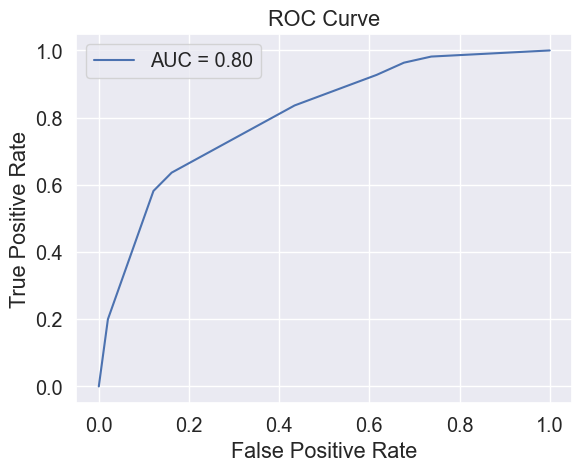

AUC: 0.80


In [13]:
# predict class probabilities for test set
y_prob = optimal_dt.predict_proba(X_test)[:, 1]

# calculate AUC
auc = roc_auc_score(Y_test, y_prob)

# plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# print AUC value
print(f'AUC: {auc:.2f}')

In [15]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Generate a sample dataset for illustration
X, y = make_classification(n_samples=100, n_features=4, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier and train it
dt = DecisionTreeClassifier(max_depth=3, criterion='gini', splitter='best')

# Fit the model to the training data
dt.fit(X_train, y_train)

# Now it's safe to access tree-related attributes
n_nodes = dt.tree_.node_count  # Number of nodes in the tree
tree_depth = dt.tree_.max_depth  # Depth of the tree

print("Number of nodes:", n_nodes)
print("Tree depth:", tree_depth)


Number of nodes: 5
Tree depth: 2


In [18]:
# Number of nodes and depth of decision tree without PCA
#--- Gini
n_nodes = dt.tree_.node_count
n_nodes

depth = dt.tree_.max_depth
depth

print('Gini Decision Tree without PCA')
print('Nodes:',n_nodes)
print('Depth:',depth)

Gini Decision Tree without PCA
Nodes: 5
Depth: 2


### Comparison of KNN and Decision Tree Models

The KNN model achieved a test accuracy of 76%, whereas the Decision Tree model showed a slightly higher accuracy of 77%.
This indicates a marginal advantage in accuracy for the Decision Tree model over the KNN model in this context.

However, the AUC score, which measures the model's ability to distinguish between classes,  was higher for the KNN model at 0.82 compared to the Decision Tree model. This suggests that the KNN model is more effective at identifying patients with diabetes, making it potentially more suitable for applications where the correct prediction of positive cases is crucial.